In [1]:
import data_extraction
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from tslearn.clustering import TimeSeriesKMeans, KernelKMeans
import json
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

c:\users\diego\appdata\local\programs\python\python39\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# Clustering

In [2]:
start, end = '04-12-2020', '03-27-2021'
X, I = data_extraction.get_data("Confirmed", start, end)
Populations = np.array( [[data_extraction.populations[I[i]]] for i in I] )
X /= Populations
print(X, '\n', I)

[[0.0024058  0.00254383 0.00267938 ... 0.07069263 0.07129418 0.07181465]
 [0.00064864 0.00066251 0.00069416 ... 0.10652769 0.10680434 0.10708646]
 [0.00043777 0.00046804 0.00048978 ... 0.08653515 0.08674148 0.08674148]
 ...
 [0.00043566 0.00044786 0.00045452 ... 0.09397013 0.09411239 0.09411239]
 [0.00040326 0.00041499 0.0004573  ... 0.10564699 0.10587131 0.10610124]
 [0.0017641  0.00186823 0.00195844 ... 0.07713083 0.07751405 0.07794443]] 
 {0: 'Michigan', 1: 'South Carolina', 2: 'North Carolina', 3: 'Wisconsin', 4: 'Connecticut', 5: 'Utah', 6: 'Illinois', 7: 'Colorado', 8: 'Arkansas', 9: 'Maine', 10: 'Indiana', 11: 'Tennessee', 12: 'Washington', 13: 'New Mexico', 14: 'Wyoming', 15: 'California', 16: 'Massachusetts', 17: 'Idaho', 18: 'Alaska', 19: 'Ohio', 20: 'New Jersey', 21: 'Alabama', 22: 'Louisiana', 23: 'Nevada', 24: 'Oregon', 25: 'Puerto Rico', 26: 'Missouri', 27: 'New York', 28: 'District of Columbia', 29: 'North Dakota', 30: 'Minnesota', 31: 'Texas', 32: 'Vermont', 33: 'Rhode 

In [3]:
distances = []
for K in range(1, 11):
    clusters = TimeSeriesKMeans(n_clusters=K).fit(X)
    distances.append( clusters.inertia_ )
print(distances)

[0.07688265377189503, 0.03293754449033014, 0.018964164039280466, 0.012497426886157039, 0.009985002236169598, 0.009347617266371828, 0.007288629878236295, 0.005794780537719817, 0.005810152081093704, 0.004390141892437061]


<Figure size 432x288 with 0 Axes>

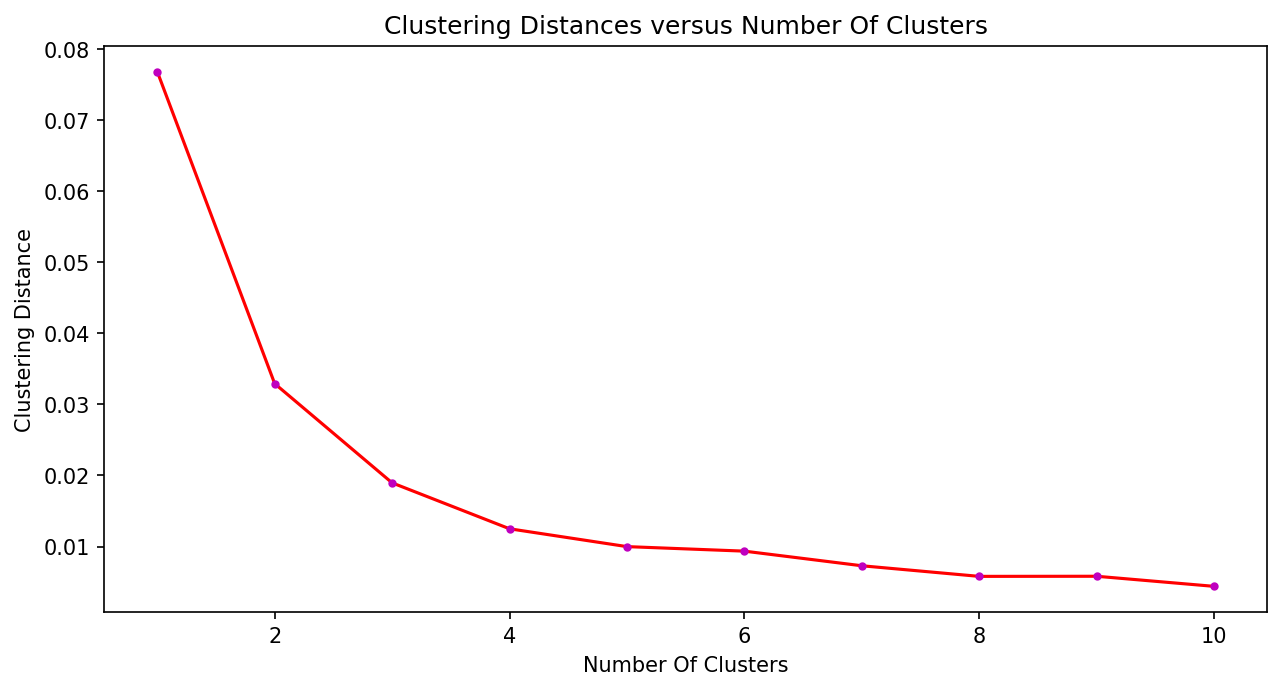

In [4]:
plt.figure(0)
plt.figure(figsize=(10, 5), dpi=150)
ks = [i for i in range(1, 11)]
plt.plot( ks, distances, 'r' )
plt.plot( ks, distances, 'm.' )
plt.title("Clustering Distances versus Number Of Clusters")
plt.xlabel("Number Of Clusters")
plt.ylabel("Clustering Distance")
plt.savefig("Clusters_Year.jpg")
plt.show()
plt.close()

In [12]:
k = 5
clustering = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter = 5000).fit(X)

In [13]:
cluster_mapping = {l:[] for l in range(k)}
cluster_states = {s:[] for s in range(k)}
for i in range( len( clustering.labels_ ) ):
    cluster_mapping[ clustering.labels_[i] ].append( X[i] )
    cluster_states[ clustering.labels_[i] ].append( I[i] )

In [14]:
print(cluster_states)

{0: ['North Carolina', 'Connecticut', 'Illinois', 'Colorado', 'New Mexico', 'Wyoming', 'California', 'Massachusetts', 'Idaho', 'Alaska', 'Ohio', 'New Jersey', 'Louisiana', 'Nevada', 'Missouri', 'New York', 'Minnesota', 'Texas', 'Montana', 'Florida', 'West Virginia', 'Delaware', 'Georgia', 'Kentucky', 'Pennsylvania'], 1: ['Maine', 'Oregon', 'Puerto Rico', 'Vermont', 'Hawaii'], 2: ['North Dakota', 'Rhode Island', 'South Dakota'], 3: ['South Carolina', 'Wisconsin', 'Utah', 'Arkansas', 'Indiana', 'Tennessee', 'Alabama', 'Mississippi', 'Iowa', 'Arizona', 'Kansas', 'Oklahoma', 'Nebraska'], 4: ['Michigan', 'Washington', 'District of Columbia', 'Virginia', 'New Hampshire', 'Maryland']}


# Period 1: April 12th, 2020 - August 1st, 2020

In [18]:
start, end = '04-12-2020', '08-01-2020'
X, I = data_extraction.get_data("Confirmed", start, end)
Populations = np.array( [[data_extraction.populations[I[i]]] for i in I] )
X /= Populations
print(X, '\n', I)

[[0.00079701 0.00081177 0.00084317 ... 0.01488546 0.01533229 0.01565425]
 [0.00076505 0.00077538 0.00079604 ... 0.01100643 0.01126417 0.0114784 ]
 [0.00061103 0.00066583 0.00071622 ... 0.01030008 0.01041408 0.01051985]
 ...
 [0.00049528 0.00051807 0.00053262 ... 0.02388282 0.02433195 0.02475033]
 [0.0024058  0.00254383 0.00267938 ... 0.0089092  0.0089879  0.00906311]
 [0.00116837 0.00123189 0.00125665 ... 0.0096165  0.00974928 0.00989193]] 
 {0: 'Tennessee', 1: 'Idaho', 2: 'Virginia', 3: 'Utah', 4: 'New Mexico', 5: 'Alaska', 6: 'Illinois', 7: 'Kansas', 8: 'Maryland', 9: 'Montana', 10: 'North Dakota', 11: 'Rhode Island', 12: 'Louisiana', 13: 'Maine', 14: 'Delaware', 15: 'Connecticut', 16: 'Ohio', 17: 'Vermont', 18: 'Arkansas', 19: 'Pennsylvania', 20: 'South Carolina', 21: 'North Carolina', 22: 'Colorado', 23: 'Wisconsin', 24: 'Missouri', 25: 'Texas', 26: 'Mississippi', 27: 'Florida', 28: 'West Virginia', 29: 'Iowa', 30: 'Nevada', 31: 'Puerto Rico', 32: 'New York', 33: 'New Jersey', 34: 

In [3]:
labels = [
    "April", "May", "June", "July", "August"
]
indices = data_extraction.label_indices(start, end)

In [4]:
distances = []
for K in range(1, 11):
    clusters = TimeSeriesKMeans(n_clusters=K).fit(X)
    distances.append( clusters.inertia_ )
print(distances)

[0.0018958039449946226, 0.0007871246135980599, 0.0004342017972992097, 0.0003470504481322606, 0.00027420489039265805, 0.00019892067401281564, 0.00013689982596654693, 0.0001398714320758161, 7.91978788752182e-05, 7.302098086146487e-05]


<Figure size 432x288 with 0 Axes>

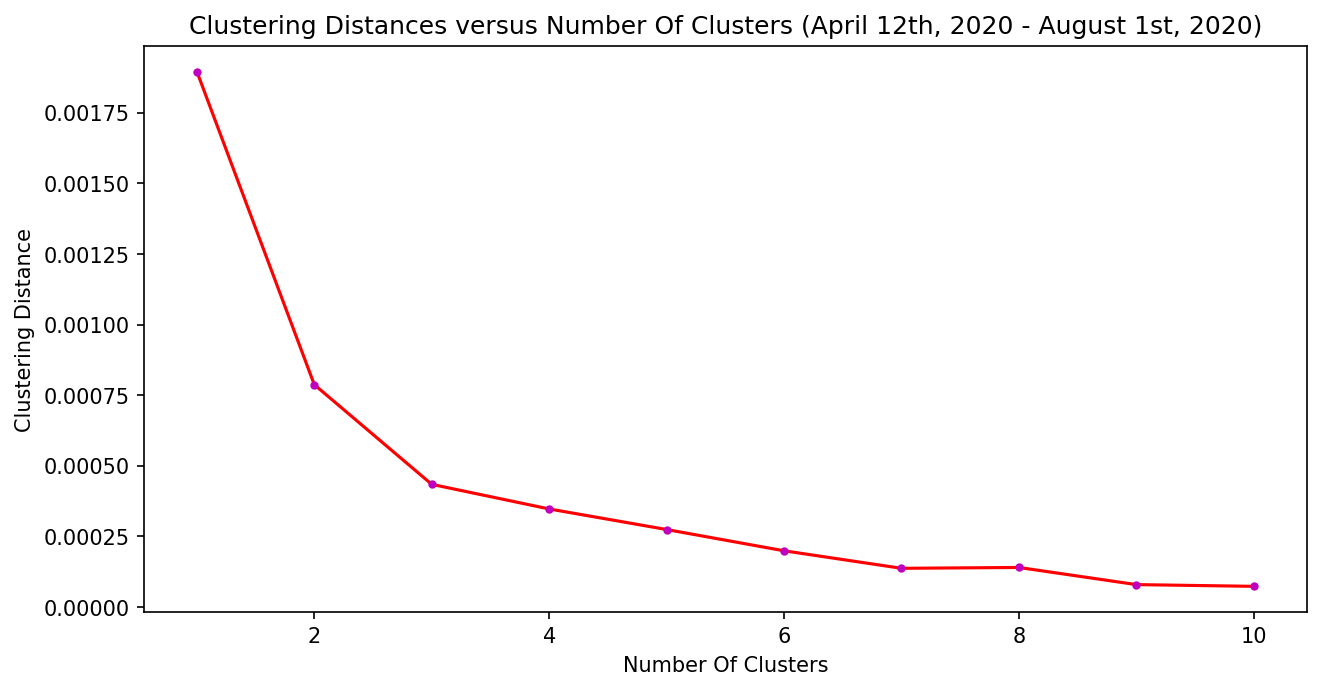

In [5]:
plt.figure(0)
plt.figure(figsize=(10, 5), dpi=150)
ks = [i for i in range(1, 11)]
plt.plot( ks, distances, 'r' )
plt.plot( ks, distances, 'm.' )
plt.title("Clustering Distances versus Number Of Clusters (April 12th, 2020 - August 1st, 2020)")
plt.xlabel("Number Of Clusters")
plt.ylabel("Clustering Distance")
plt.savefig("Period1_Elbow.jpg")
plt.show()
plt.close()

In [19]:
k = 5
clustering = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter = 3000).fit(X)

In [20]:
cluster_mapping = {l:[] for l in range(k)}
cluster_states_1 = {s:[] for s in range(k)}
for i in range( len( clustering.labels_ ) ):
    cluster_mapping[ clustering.labels_[i] ].append( X[i] )
    cluster_states_1[ clustering.labels_[i] ].append( I[i] )

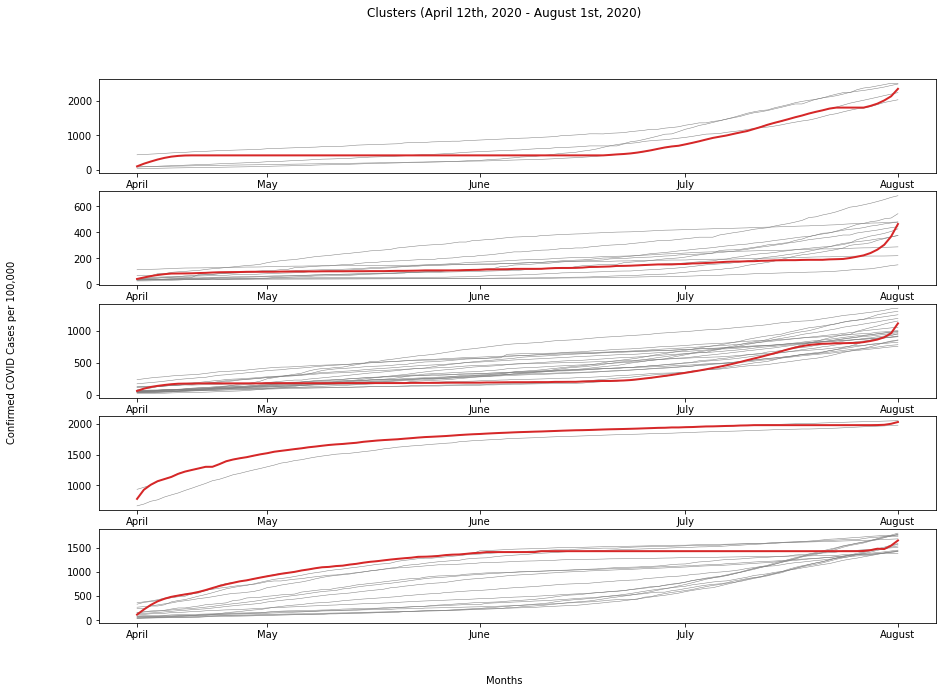

<Figure size 432x288 with 0 Axes>

In [21]:
fig, axs = plt.subplots(k, figsize=(15,10))
plt.figure(0)
#plt.xticks( indices, labels )
x = [i for i in range(len(X[i]))]
plt.setp(axs, xticks=indices, xticklabels=labels)
fig.text(0.5, 0.04, 'Months', ha='center')
fig.text(0.04, 0.5, 'Confirmed COVID Cases per 100,000', va='center', rotation='vertical')
for i in range(k):
    
    for time_series in cluster_mapping[i]:
        axs[i].plot(x, 100000*time_series, 'tab:gray', linewidth=0.5)
        
    axs[i].plot(x, 100000*clustering.cluster_centers_[i], 'tab:red', linewidth=2)
    fig.suptitle('Clusters (April 12th, 2020 - August 1st, 2020)')

fig.savefig("Period1_Clusters.jpg")
plt.show()
plt.close()

In [23]:
print(cluster_states_1)

{0: ['Louisiana', 'Mississippi', 'Florida', 'Arizona'], 1: ['Alaska', 'Montana', 'Maine', 'Vermont', 'West Virginia', 'Puerto Rico', 'Wyoming', 'Hawaii', 'New Hampshire', 'Oregon', 'Kentucky'], 2: ['Idaho', 'Virginia', 'Utah', 'New Mexico', 'Kansas', 'North Dakota', 'Ohio', 'Pennsylvania', 'North Carolina', 'Colorado', 'Wisconsin', 'Missouri', 'Washington', 'South Dakota', 'Oklahoma', 'Nebraska', 'Minnesota', 'California', 'Michigan', 'Indiana'], 3: ['New York', 'New Jersey'], 4: ['Tennessee', 'Illinois', 'Maryland', 'Rhode Island', 'Delaware', 'Connecticut', 'Arkansas', 'South Carolina', 'Texas', 'Iowa', 'Nevada', 'Massachusetts', 'District of Columbia', 'Alabama', 'Georgia']}


# Period 2: August 1st, 2020 - November 1st, 2020

In [24]:
start, end = '08-01-2020', '11-01-2020'
X, I = data_extraction.get_data("Confirmed", start, end)
Populations = np.array( [[data_extraction.populations[I[i]]] for i in I] )
X /= Populations
print(X, '\n', I)

[[0.01565425 0.01586305 0.01600905 ... 0.03754797 0.03771929 0.0378284 ]
 [0.0114784  0.0114784  0.0117829  ... 0.03469621 0.03513011 0.03539111]
 [0.01051985 0.01063351 0.0107869  ... 0.02081228 0.02099198 0.02113124]
 ...
 [0.02475033 0.02495518 0.0250992  ... 0.034125   0.03439082 0.03460434]
 [0.00906311 0.00910539 0.00916651 ... 0.0191904  0.01958912 0.01958912]
 [0.00989193 0.01000025 0.01008514 ... 0.02592179 0.02643243 0.02683771]] 
 {0: 'Tennessee', 1: 'Idaho', 2: 'Virginia', 3: 'Utah', 4: 'New Mexico', 5: 'Alaska', 6: 'Illinois', 7: 'Kansas', 8: 'Maryland', 9: 'Montana', 10: 'North Dakota', 11: 'Rhode Island', 12: 'Louisiana', 13: 'Maine', 14: 'Delaware', 15: 'Connecticut', 16: 'Ohio', 17: 'Vermont', 18: 'Arkansas', 19: 'Pennsylvania', 20: 'South Carolina', 21: 'North Carolina', 22: 'Colorado', 23: 'Wisconsin', 24: 'Missouri', 25: 'Texas', 26: 'Mississippi', 27: 'Florida', 28: 'West Virginia', 29: 'Iowa', 30: 'Nevada', 31: 'Puerto Rico', 32: 'New York', 33: 'New Jersey', 34: 

In [25]:
labels = [
    "August", "September", "October", "November"
]
indices = data_extraction.label_indices(start, end)

In [49]:
distances = []
for K in range(1, 11):
    clusters = TimeSeriesKMeans(n_clusters=K, metric="dtw").fit(X)
    distances.append( clusters.inertia_ )
print(distances)

[0.0017690170151580655, 0.0003662548301572422, 0.00019558973861968907, 0.00014843072869926636, 8.31360692683087e-05, 6.177704483633064e-05, 5.911506382420331e-05, 3.987493786258899e-05, 2.887692095744111e-05, 2.662801512375108e-05]


<Figure size 432x288 with 0 Axes>

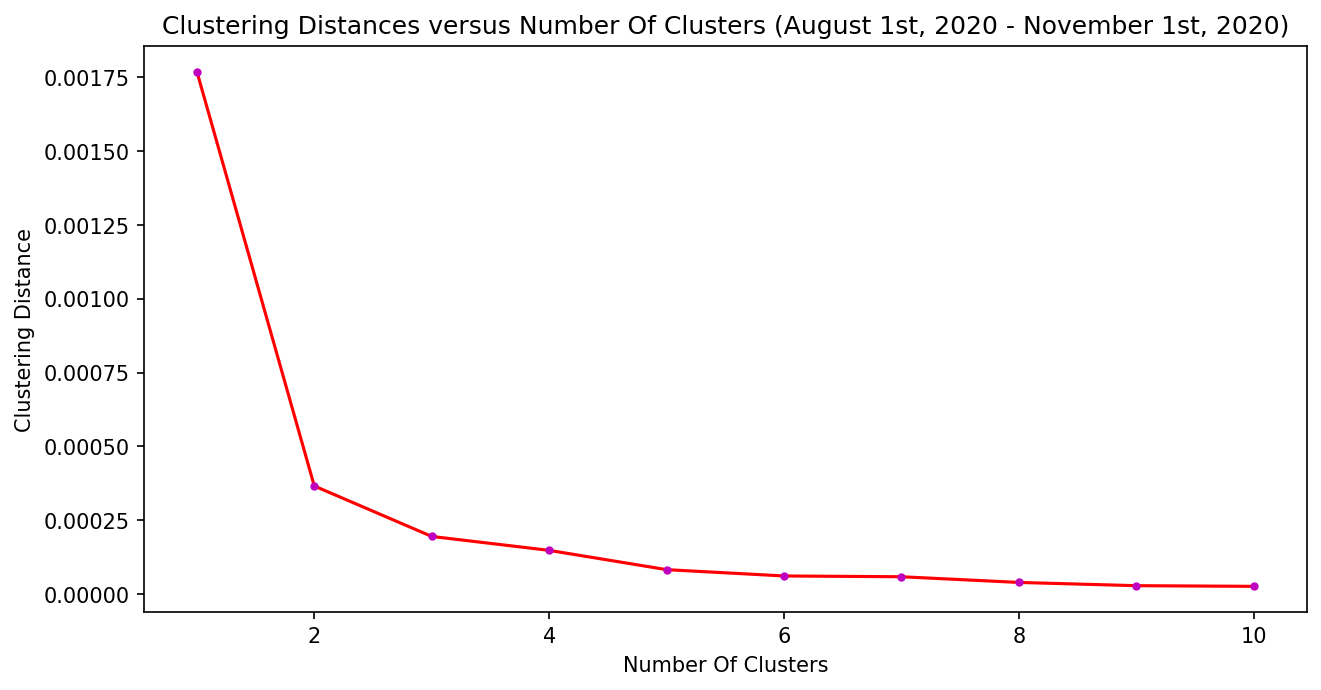

In [54]:
plt.figure(0)
plt.figure(figsize=(10, 5), dpi=150)
ks = [i for i in range(1, 11)]
plt.plot( ks, distances, 'r' )
plt.plot( ks, distances, 'm.' )
plt.title("Clustering Distances versus Number Of Clusters (August 1st, 2020 - November 1st, 2020)")
plt.xlabel("Number Of Clusters")
plt.ylabel("Clustering Distance")
plt.savefig("Period2_Elbow.jpg")
plt.show()
plt.close()

In [26]:
k = 5
clustering = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter = 3000).fit(X)

In [27]:
cluster_mapping = {l:[] for l in range(k)}
cluster_states_2 = {s:[] for s in range(k)}
for i in range( len( clustering.labels_ ) ):
    cluster_mapping[ clustering.labels_[i] ].append( X[i] )
    cluster_states_2[ clustering.labels_[i] ].append( I[i] )

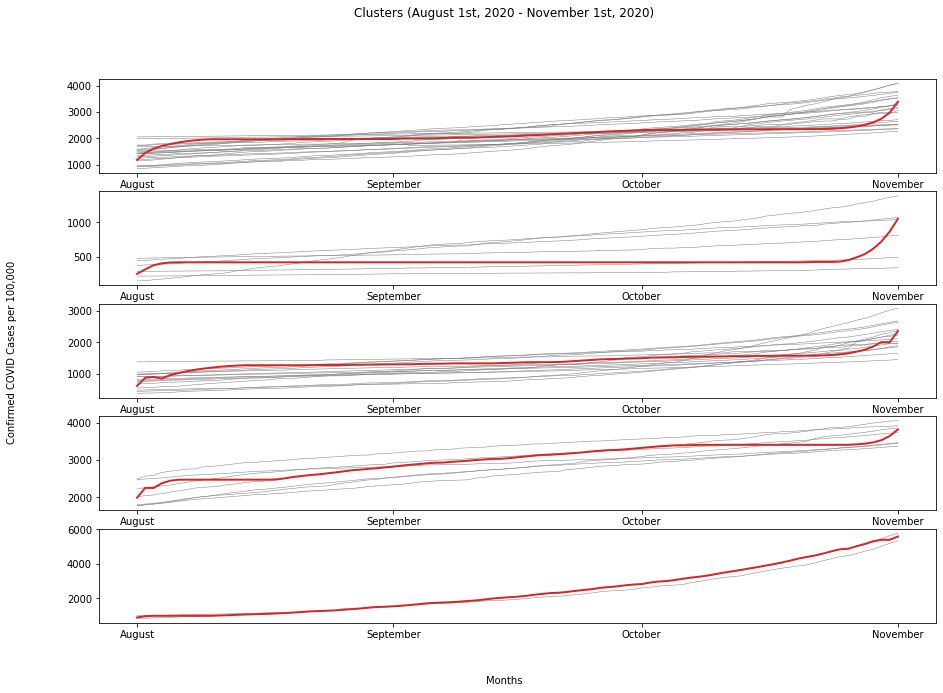

<Figure size 432x288 with 0 Axes>

In [28]:
fig, axs = plt.subplots(k, figsize=(15,10))
plt.figure(0)
#plt.xticks( indices, labels )
x = [i for i in range(len(X[i]))]
plt.setp(axs, xticks=indices, xticklabels=labels)
fig.text(0.5, 0.04, 'Months', ha='center')
fig.text(0.04, 0.5, 'Confirmed COVID Cases per 100,000', va='center', rotation='vertical')
for i in range(k):
    
    for time_series in cluster_mapping[i]:
        axs[i].plot(x, 100000*time_series, 'tab:gray', linewidth=0.5)
        
    axs[i].plot(x, 100000*clustering.cluster_centers_[i], 'tab:red', linewidth=2)
    fig.suptitle('Clusters (August 1st, 2020 - November 1st, 2020)')

fig.savefig("Period2_Clusters.jpg")
plt.show()
plt.close()

In [29]:
print(cluster_states_2)

{0: ['Tennessee', 'Idaho', 'Utah', 'Illinois', 'Kansas', 'Maryland', 'Rhode Island', 'Delaware', 'Arkansas', 'North Carolina', 'Wisconsin', 'Missouri', 'Texas', 'Iowa', 'Nevada', 'New York', 'New Jersey', 'Massachusetts', 'District of Columbia', 'Oklahoma', 'Nebraska', 'California'], 1: ['Maine', 'Vermont', 'West Virginia', 'Hawaii', 'New Hampshire', 'Oregon'], 2: ['Virginia', 'New Mexico', 'Alaska', 'Montana', 'Connecticut', 'Ohio', 'Pennsylvania', 'Colorado', 'Puerto Rico', 'Washington', 'Wyoming', 'Minnesota', 'Kentucky', 'Michigan', 'Indiana'], 3: ['Louisiana', 'South Carolina', 'Mississippi', 'Florida', 'Alabama', 'Georgia', 'Arizona'], 4: ['North Dakota', 'South Dakota']}


# Period 3: November 1st, 2020 - January 20th, 2021

In [30]:
start, end = '11-01-2020', '01-20-2021'
X, I = data_extraction.get_data("Confirmed", start, end)
Populations = np.array( [[data_extraction.populations[I[i]]] for i in I] )
X /= Populations
print(X, '\n', I)

[[0.0378284  0.03828579 0.03854191 ... 0.09951771 0.09985255 0.10046405]
 [0.03539111 0.03580272 0.03644379 ... 0.08458131 0.08524685 0.08568729]
 [0.02113124 0.0212501  0.0213962  ... 0.05173557 0.05225993 0.05278302]
 ...
 [0.03460434 0.03469747 0.03493224 ... 0.09498452 0.09588182 0.0965593 ]
 [0.01958912 0.02027581 0.02061687 ... 0.05806379 0.0582171  0.05853425]
 [0.02683771 0.02729117 0.02771575 ... 0.08734899 0.08775087 0.08817486]] 
 {0: 'Tennessee', 1: 'Idaho', 2: 'Virginia', 3: 'Utah', 4: 'New Mexico', 5: 'Alaska', 6: 'Illinois', 7: 'Kansas', 8: 'Maryland', 9: 'Montana', 10: 'North Dakota', 11: 'Rhode Island', 12: 'Louisiana', 13: 'Maine', 14: 'Delaware', 15: 'Connecticut', 16: 'Ohio', 17: 'Vermont', 18: 'Arkansas', 19: 'Pennsylvania', 20: 'South Carolina', 21: 'North Carolina', 22: 'Colorado', 23: 'Wisconsin', 24: 'Missouri', 25: 'Texas', 26: 'Mississippi', 27: 'Florida', 28: 'West Virginia', 29: 'Iowa', 30: 'Nevada', 31: 'Puerto Rico', 32: 'New York', 33: 'New Jersey', 34: 

In [31]:
labels = [
    "November", "December", "January"
]
indices = data_extraction.label_indices(start, end)

In [58]:
distances = []
for K in range(1, 11):
    clusters = TimeSeriesKMeans(n_clusters=K, metric="dtw").fit(X)
    distances.append( clusters.inertia_ )
print(distances)

[0.006164452848347675, 0.0014291069313381627, 0.0007800860267166075, 0.00026580562784934666, 0.00023563419995400623, 0.0001367276769800664, 0.00011195806692289067, 8.812734509086095e-05, 7.165472440291769e-05, 6.434937996104581e-05]


<Figure size 432x288 with 0 Axes>

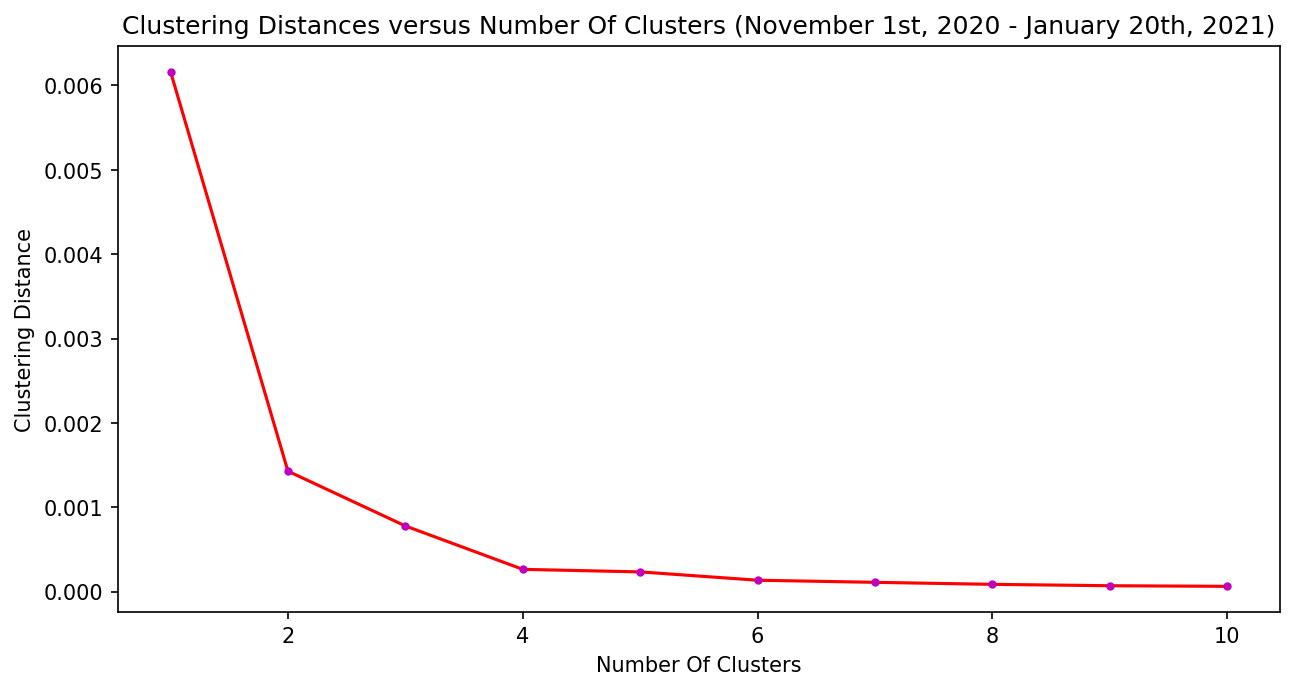

In [59]:
plt.figure(0)
plt.figure(figsize=(10, 5), dpi=150)
ks = [i for i in range(1, 11)]
plt.plot( ks, distances, 'r' )
plt.plot( ks, distances, 'm.' )
plt.title("Clustering Distances versus Number Of Clusters (November 1st, 2020 - January 20th, 2021)")
plt.xlabel("Number Of Clusters")
plt.ylabel("Clustering Distance")
plt.savefig("Period3_Elbow.jpg")
plt.show()
plt.close()

In [32]:
k = 5
clustering = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter = 3000).fit(X)

In [33]:
cluster_mapping = {l:[] for l in range(k)}
cluster_states_3 = {s:[] for s in range(k)}
for i in range( len( clustering.labels_ ) ):
    cluster_mapping[ clustering.labels_[i] ].append( X[i] )
    cluster_states_3[ clustering.labels_[i] ].append( I[i] )

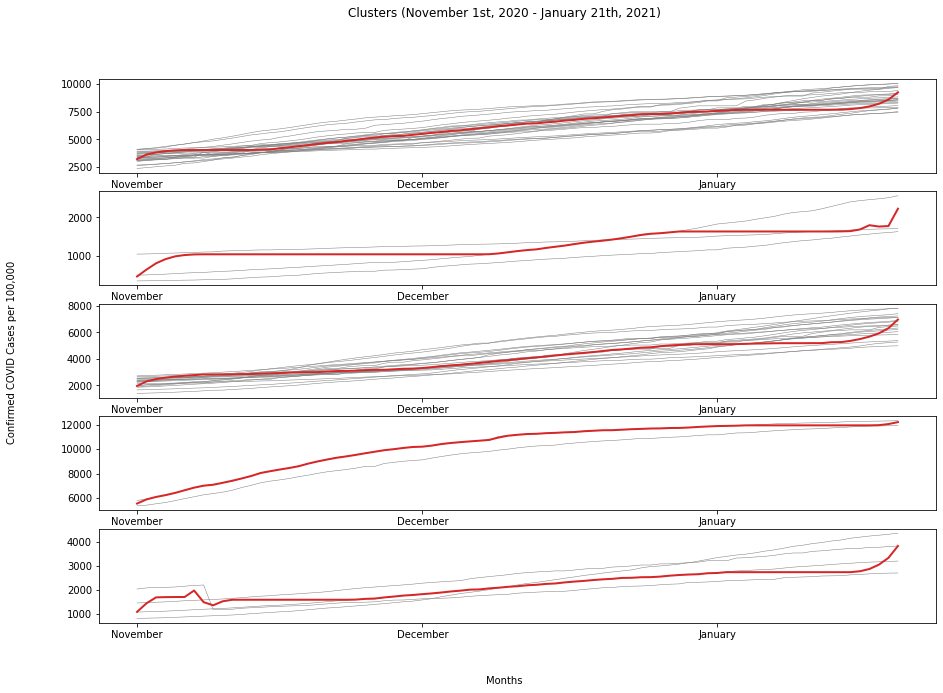

<Figure size 432x288 with 0 Axes>

In [34]:
fig, axs = plt.subplots(k, figsize=(15,10))
plt.figure(0)
#plt.xticks( indices, labels )
x = [i for i in range(len(X[i]))]
plt.setp(axs, xticks=indices, xticklabels=labels)
fig.text(0.5, 0.04, 'Months', ha='center')
fig.text(0.04, 0.5, 'Confirmed COVID Cases per 100,000', va='center', rotation='vertical')
for i in range(k):
    
    for time_series in cluster_mapping[i]:
        axs[i].plot(x, 100000*time_series, 'tab:gray', linewidth=0.5)
        
    axs[i].plot(x, 100000*clustering.cluster_centers_[i], 'tab:red', linewidth=2)
    fig.suptitle('Clusters (November 1st, 2020 - January 21th, 2021)')

fig.savefig("Period3_Clusters.jpg")
plt.show()
plt.close()

In [35]:
print(cluster_states_3)

{0: ['Tennessee', 'Idaho', 'Utah', 'Illinois', 'Kansas', 'Montana', 'Rhode Island', 'Louisiana', 'Arkansas', 'South Carolina', 'Wisconsin', 'Missouri', 'Texas', 'Mississippi', 'Florida', 'Iowa', 'Nevada', 'Wyoming', 'Oklahoma', 'Alabama', 'Georgia', 'Nebraska', 'Minnesota', 'Arizona', 'Indiana'], 1: ['Maine', 'Vermont', 'Hawaii'], 2: ['Virginia', 'New Mexico', 'Alaska', 'Maryland', 'Delaware', 'Connecticut', 'Ohio', 'Pennsylvania', 'North Carolina', 'Colorado', 'West Virginia', 'New York', 'New Jersey', 'Massachusetts', 'District of Columbia', 'Kentucky', 'California', 'Michigan'], 3: ['North Dakota', 'South Dakota'], 4: ['Puerto Rico', 'Washington', 'New Hampshire', 'Oregon']}


In [107]:
with open('data.json', 'w') as json_file:
    json.dump("Period 1 Clusters", json_file, indent="0")
    json.dump(cluster_states_1, json_file, indent="\t")
    
    json.dump("Period 2 Clusters", json_file, indent="0")
    json.dump(cluster_states_2, json_file, indent="\t")
    
    json.dump("Period 3 Clusters", json_file, indent="0")
    json.dump(cluster_states_3, json_file, indent="\t")

# Forecasting

In [2]:
training_start, training_end = '04-12-2020', '11-01-2020'
training_data, I = data_extraction.get_data("Confirmed", training_start, training_end)
Populations = np.array( [[data_extraction.populations[I[i]]] for i in I] )
training_data /= Populations
print(training_data, '\n', I)

[[0.00058795 0.00059598 0.00063518 ... 0.02168053 0.02195491 0.02230532]
 [0.00116244 0.00124301 0.00136092 ... 0.03344175 0.03368121 0.03379249]
 [0.00035694 0.00036339 0.000368   ... 0.02943669 0.03025295 0.03089303]
 ...
 [0.00442166 0.00451204 0.00461982 ... 0.03913257 0.03913257 0.03936251]
 [0.00333754 0.00371082 0.00387943 ... 0.01974712 0.01974712 0.01974712]
 [0.00093912 0.00099349 0.00104245 ... 0.0402988  0.04057706 0.04069188]] 
 {0: 'New Mexico', 1: 'Georgia', 2: 'Montana', 3: 'Alabama', 4: 'Maryland', 5: 'Oklahoma', 6: 'Tennessee', 7: 'Oregon', 8: 'New Hampshire', 9: 'New York', 10: 'Iowa', 11: 'Texas', 12: 'Vermont', 13: 'Michigan', 14: 'California', 15: 'District of Columbia', 16: 'Maine', 17: 'Missouri', 18: 'Utah', 19: 'Virginia', 20: 'Illinois', 21: 'Wyoming', 22: 'Florida', 23: 'West Virginia', 24: 'Washington', 25: 'Pennsylvania', 26: 'Indiana', 27: 'North Dakota', 28: 'Massachusetts', 29: 'Kentucky', 30: 'Kansas', 31: 'Nevada', 32: 'Puerto Rico', 33: 'North Caroli

In [3]:
test_start, test_end = '11-01-2020', '01-20-2021'
test_data, I = data_extraction.get_data("Confirmed", test_start, test_end)
Populations = np.array( [[data_extraction.populations[I[i]]] for i in I] )
test_data /= Populations
print(test_data, '\n', I)

[[0.02230532 0.02271712 0.0232536  ... 0.07757322 0.07789954 0.0783156 ]
 [0.03379249 0.03388015 0.0368306  ... 0.07663919 0.07735139 0.07810457]
 [0.03089303 0.03159123 0.03242777 ... 0.08261754 0.08288317 0.08324379]
 ...
 [0.03936251 0.03942155 0.03966909 ... 0.07942686 0.07988588 0.08042111]
 [0.01974712 0.02048229 0.02075545 ... 0.06381824 0.06439895 0.06493002]
 [0.04069188 0.04081513 0.04103261 ... 0.08575079 0.08615365 0.0867284 ]] 
 {0: 'New Mexico', 1: 'Georgia', 2: 'Montana', 3: 'Alabama', 4: 'Maryland', 5: 'Oklahoma', 6: 'Tennessee', 7: 'Oregon', 8: 'New Hampshire', 9: 'New York', 10: 'Iowa', 11: 'Texas', 12: 'Vermont', 13: 'Michigan', 14: 'California', 15: 'District of Columbia', 16: 'Maine', 17: 'Missouri', 18: 'Utah', 19: 'Virginia', 20: 'Illinois', 21: 'Wyoming', 22: 'Florida', 23: 'West Virginia', 24: 'Washington', 25: 'Pennsylvania', 26: 'Indiana', 27: 'North Dakota', 28: 'Massachusetts', 29: 'Kentucky', 30: 'Kansas', 31: 'Nevada', 32: 'Puerto Rico', 33: 'North Caroli

In [4]:
state = 28

In [5]:
training_array, test_array = np.reshape(training_data[state], (-1,1)), np.reshape(test_data[state], (-1,1))
time = np.array([[i] for i in range(len(training_array)+len(test_array))])

In [9]:
print(training_array, test_array)

[[0.0036238 ]
 [0.00382181]
 [0.00400631]
 [0.00425581]
 [0.00457772]
 [0.00489366]
 [0.00517389]
 [0.00541642]
 [0.00541642]
 [0.00586052]
 [0.00610875]
 [0.00654673]
 [0.0072503 ]
 [0.00758871]
 [0.00781489]
 [0.00803167]
 [0.00829341]
 [0.00857265]
 [0.00884861]
 [0.00914819]
 [0.00942586]
 [0.00968532]
 [0.00982757]
 [0.00999599]
 [0.0102455 ]
 [0.01048675]
 [0.01071606]
 [0.01091663]
 [0.01106599]
 [0.01116116]
 [0.01128491]
 [0.01145063]
 [0.01169032]
 [0.01186657]
 [0.01208165]
 [0.01223485]
 [0.01238308]
 [0.01250726]
 [0.01265591]
 [0.01281438]
 [0.01292889]
 [0.01303885]
 [0.01318294]
 [0.01326772]
 [0.01332775]
 [0.01340272]
 [0.01349874]
 [0.0135865 ]
 [0.01369874]
 [0.01379319]
 [0.01433943]
 [0.01439035]
 [0.01445138]
 [0.01451838]
 [0.01458865]
 [0.01467044]
 [0.01471369]
 [0.01474071]
 [0.01477813]
 [0.01481611]
 [0.0148888 ]
 [0.01494456]
 [0.01499235]
 [0.01502194]
 [0.01503432]
 [0.01506206]
 [0.01509989]
 [0.01513844]
 [0.01517088]
 [0.01521156]
 [0.01522934]
 [0.01

In [6]:
training_time = np.hstack( (time[:len(training_array)], time[:len(training_array)]**2, time[:len(training_array)]**3) )
test_time = np.hstack( (time[len(training_array):], time[len(training_array):]**2, time[len(training_array):]**3) )

In [7]:
training_time = np.hstack( (time[:len(training_array)], time[:len(training_array)]**2) )
test_time = np.hstack( (time[len(training_array):], time[len(training_array):]**2) )

In [8]:
training_time = time[:len(training_array)]
test_time = time[len(training_array):]

In [192]:
LR = LinearRegression().fit(training_time, training_array)
Linear = LR.predict(training_time)
residuals = training_array - Linear
Linear_predict = LR.predict(test_time)

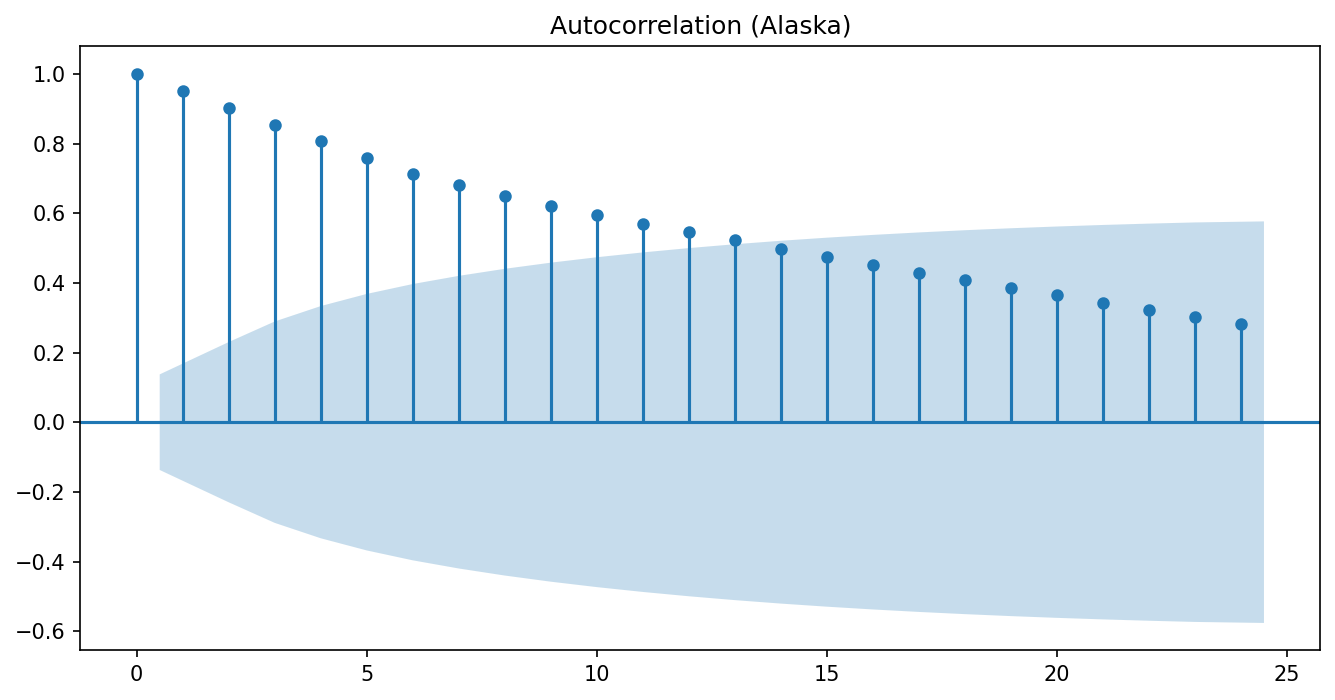

In [193]:
figure, axs = plt.subplots(1,figsize=(1600/150, 800/150), dpi=150)
plot_acf( residuals, axs )
plt.title(f"Autocorrelation (Alaska)")
plt.savefig(f"ACF_Fall_Alaska.jpg")
plt.show()
plt.close()
#Order 8

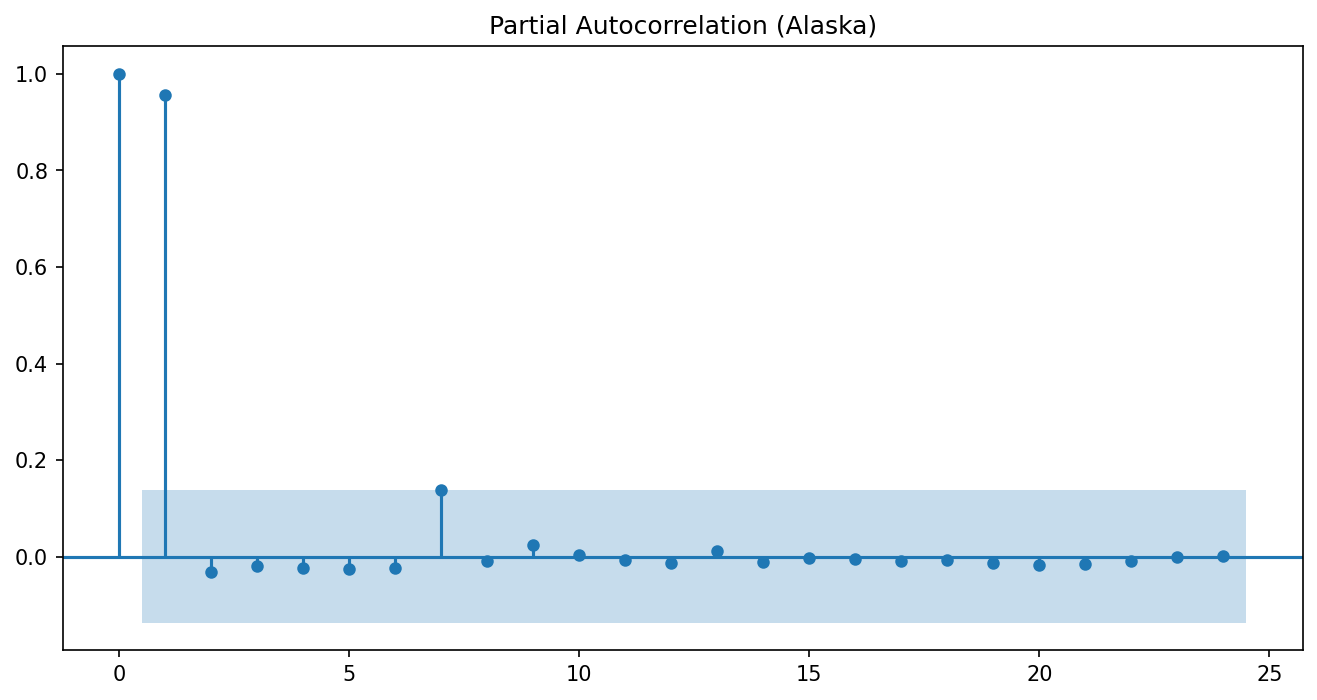

In [194]:
figure, axs = plt.subplots(1,figsize=(1600/150, 800/150), dpi=150)
plot_pacf( residuals, axs )
plt.title(f"Partial Autocorrelation (Alaska)")
plt.savefig(f"PACF_Fall_Alaska.jpg")
plt.show()
plt.close()
#Order 1

In [165]:
parameters = ARIMA( residuals, order=(1,0,10) ).fit()
ARMA_prediction = np.reshape( parameters.predict( start=len(training_array), end=len(training_array)+len(test_array)-1 ), (-1, 1) )

c:\users\diego\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\diego\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [166]:
prediction = Linear_predict + ARMA_prediction

In [167]:
MSE = mean_squared_error( test_array, prediction )
print(MSE)

0.0003226232953120672


In [168]:
labels = [
    "04/20", 
    "05/20", 
    "06/20", 
    "07/20", 
    "08/20", 
    "09/20", 
    "10/20",
    "11/20",
    "12/20",
    "01/21"
]
indices = data_extraction.label_indices(training_start, test_end)

<Figure size 432x288 with 0 Axes>

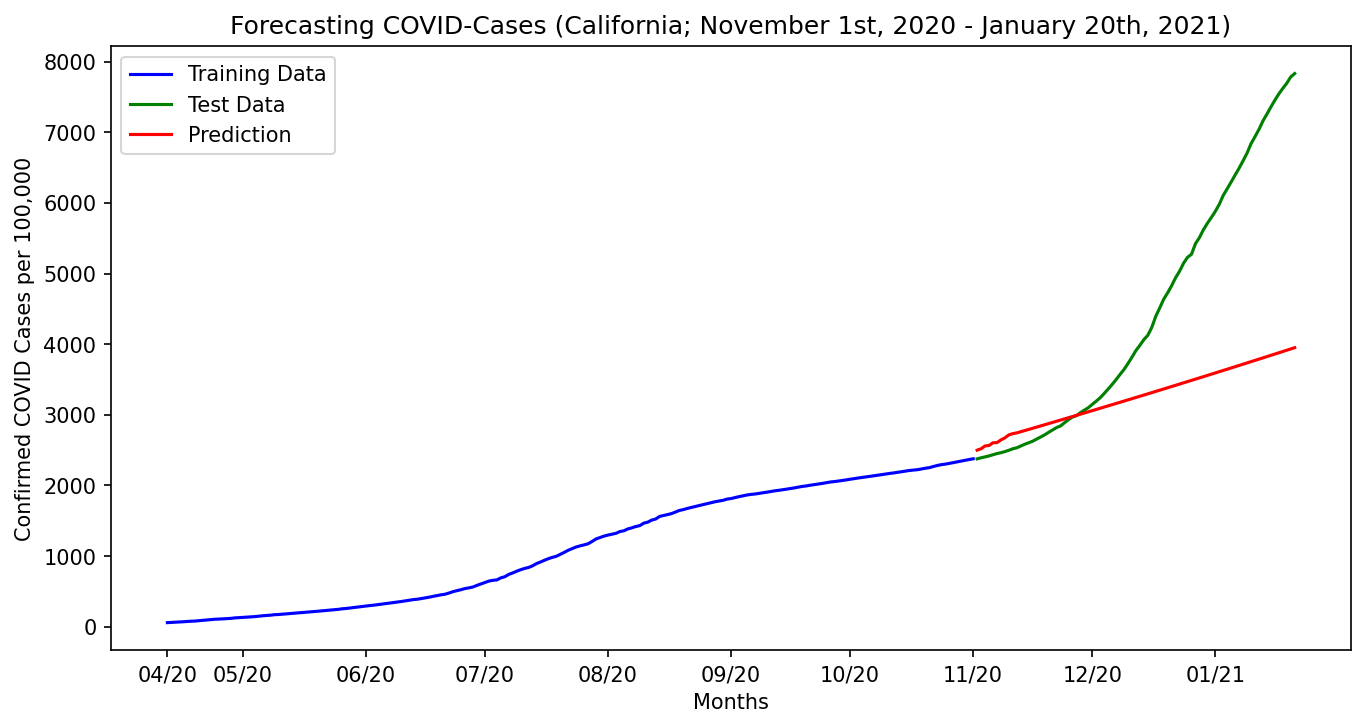

In [170]:
plt.figure(0)
plt.figure(figsize=(1600/150, 800/150), dpi=150)
plt.title( "Forecasting COVID-Cases (California; November 1st, 2020 - January 20th, 2021)")
plt.plot( [i for i in range(len(training_array))], 100000*training_array, 'b', label="Training Data" )
plt.plot( [i for i in range(len(training_array), len(training_array)+len(test_array))], 100000*test_array, 'g', label="Test Data" )
plt.plot( [i for i in range(len(training_array), len(training_array)+len(test_array))], 100000*prediction, 'r', label="Prediction" )

plt.legend()
plt.xlabel('Months')
plt.ylabel("Confirmed COVID Cases per 100,000")
plt.xticks( indices, labels )
plt.savefig('California.jpg')
plt.show()
plt.close()

In [ ]:
MSE = [2.323538257327358e-05, 0.0007441590064911953]

In [ ]:
MSE_large = [0.00010213460597584828, 0.00010142281686940184]